In [65]:
import pandas as pd
import seaborn as sns
import os

Which country shall we plot?

In [66]:
country = 'IND'

Prepare the dataframe: Read in all 5 SSPs, combine them into one dataframe, and pick out only the rows for the current country:

In [67]:
SSP1 = pd.read_csv(os.path.expanduser('~') + '/Dropbox/CISCdata/SSPs/pop-SSP1.csv', index_col="ISO").assign(SSP="SSP1")

SSP2 = pd.read_csv(os.path.expanduser('~') + '/Dropbox/CISCdata/SSPs/pop-SSP2.csv', index_col="ISO").assign(SSP="SSP2")

SSP3 = pd.read_csv(os.path.expanduser('~') + '/Dropbox/CISCdata/SSPs/pop-SSP3.csv', index_col="ISO").assign(SSP="SSP3")

SSP4 = pd.read_csv(os.path.expanduser('~') + '/Dropbox/CISCdata/SSPs/pop-SSP4.csv', index_col="ISO").assign(SSP="SSP4")

SSP5 = pd.read_csv(os.path.expanduser('~') + '/Dropbox/CISCdata/SSPs/pop-SSP5.csv', index_col="ISO").assign(SSP="SSP5")

SSPs = pd.concat([SSP1, SSP2, SSP3, SSP4, SSP5])
SSPs.rename(columns={'Major area, region, country or area':'Name'},inplace=True)
SSPs.drop(columns=['Country code'], inplace=True)

SSPs.loc[country]

,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100,Name,SSP
ISO,,,,,,,,,,,,
FRA,62787416,66866930,71021614,75060076,78665302,81716712,83714163,84817937,84530884,83157542,France,SSP1
FRA,62787416,66609124,70324320,73707429,76503876,78866247,80865224,82440492,83226046,82969660,France,SSP2
FRA,62787416,65446500,66506237,66526692,65333938,63195046,60569317,57522920,53935317,49989253,France,SSP3
FRA,62787416,66144646,68774662,70731572,71650093,71671193,70996793,69624915,67238217,63734688,France,SSP4
FRA,62787416,67818320,74246966,81193136,88708683,96744404,104338944,111615438,118041209,123650857,France,SSP5


To make the plotting easier, we'll pull out the name and then turn then transpose the table, turning rows to columns:

In [68]:
filtered=SSPs.loc[country]
filtered.set_index('SSP',inplace=True)
filtered.index.names = ['Index']
plotframe = filtered.transpose()
plotframe

Index,SSP1,SSP2,SSP3,SSP4,SSP5
2010,62787416,62787416,62787416,62787416,62787416
2020,66866930,66609124,65446500,66144646,67818320
2030,71021614,70324320,66506237,68774662,74246966
2040,75060076,73707429,66526692,70731572,81193136
2050,78665302,76503876,65333938,71650093,88708683
2060,81716712,78866247,63195046,71671193,96744404
2070,83714163,80865224,60569317,70996793,104338944
2080,84817937,82440492,57522920,69624915,111615438
2090,84530884,83226046,53935317,67238217,118041209
2100,83157542,82969660,49989253,63734688,123650857


Pick up the country name:

In [69]:
country_name = plotframe.iloc[10,1]
country_name

'France'

… and remove that last row:

In [70]:
plotframe = plotframe[:-1]
plotframe

Index,SSP1,SSP2,SSP3,SSP4,SSP5
2010,62787416,62787416,62787416,62787416,62787416
2020,66866930,66609124,65446500,66144646,67818320
2030,71021614,70324320,66506237,68774662,74246966
2040,75060076,73707429,66526692,70731572,81193136
2050,78665302,76503876,65333938,71650093,88708683
2060,81716712,78866247,63195046,71671193,96744404
2070,83714163,80865224,60569317,70996793,104338944
2080,84817937,82440492,57522920,69624915,111615438
2090,84530884,83226046,53935317,67238217,118041209
2100,83157542,82969660,49989253,63734688,123650857


Currently, the year is the index; we need to make it a regular column before plotting:

In [71]:
#plotframe = plotframe.reset_index()
#plotframe = plotframe.rename(columns={'index':'Year'})
plotframe

Index,SSP1,SSP2,SSP3,SSP4,SSP5
2010,62787416,62787416,62787416,62787416,62787416
2020,66866930,66609124,65446500,66144646,67818320
2030,71021614,70324320,66506237,68774662,74246966
2040,75060076,73707429,66526692,70731572,81193136
2050,78665302,76503876,65333938,71650093,88708683
2060,81716712,78866247,63195046,71671193,96744404
2070,83714163,80865224,60569317,70996793,104338944
2080,84817937,82440492,57522920,69624915,111615438
2090,84530884,83226046,53935317,67238217,118041209
2100,83157542,82969660,49989253,63734688,123650857


If we try to plot, now this won't work. Here's why:

In [72]:
plotframe.dtypes

Index
SSP1    object
SSP2    object
SSP3    object
SSP4    object
SSP5    object
dtype: object

Let's fix that: Convert all columns to integers.

In [73]:
for col in plotframe.columns:
    plotframe[col] = plotframe[col].astype(str).astype(int)

# plotframe.dtypes

/Users/carsten/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


To make plotting easier, let's stack them up:

In [74]:
plotframe = plotframe.stack()
plotframe = plotframe.reset_index()
# plotframe

Fix the column names once more, and turn the population column into millions:

In [75]:
plotframe.rename(columns={'level_0':'Year', 'Index':'SSP', 0:'Population (millions)'},inplace=True)
plotframe['Population (millions)'] = plotframe['Population (millions)'] / 1000000.0
# plotframe

Before we plot, let's make a nice color palette:

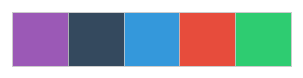

In [76]:
flatui = ["#9b59b6", "#34495e", "#3498db", "#e74c3c", "#2ecc71"]
sns.set_palette(flatui)
sns.palplot(sns.color_palette())

Make some adjustments to the seaborn settings: larger figure ("paper"), white background with grid:

In [77]:
sns.set(context="paper", style="whitegrid") 
sns.set_palette(flatui)

Now plotting is as easy as:

Text(0.5,1,'France')

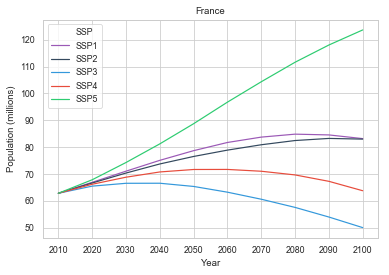

In [78]:
plot = sns.lineplot(data=plotframe, x="Year", y="Population (millions)", hue="SSP")
plot.set_title(country_name)

Save a PDF of the plot

In [79]:
fig = plot.get_figure()
fig.savefig('plots/'+country_name+'.pdf') 